# Prediction using Supervised ML

##  Business case :  Predict the percentage of an student based on the no. of study hours.
##### By Vishwanethra

In [1]:
## # importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
##iporting data 
data=pd.read_csv('http://bit.ly/w-data')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
##Basice Checks 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
## # Check is there any null value in given Dataset
data.isnull()


,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


### Exploratory Data Analysis(EDA)

#### Univariate Analysis

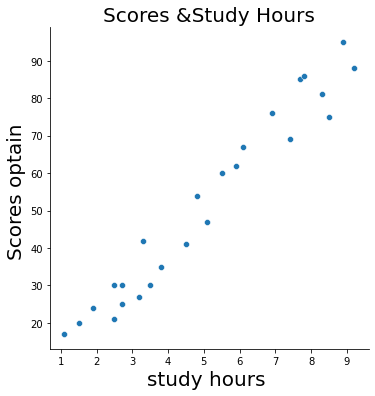

In [8]:
sns.relplot(x="Hours", y="Scores", data=data);
plt.title('Scores &Study Hours',size=20)
plt.ylabel('Scores optain ', size=20)
plt.xlabel('study hours ', size=20)
plt.show()

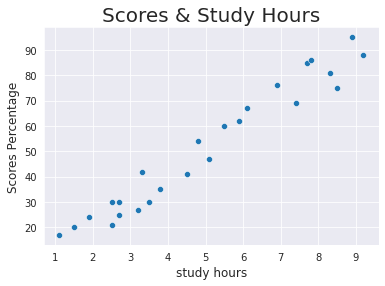

In [9]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Scores & Study Hours',size=20)
plt.ylabel('Scores Percentage', size=12)
plt.xlabel('study hours', size=12)
plt.show()

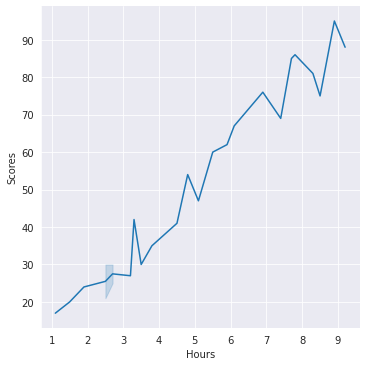

In [10]:
sns.relplot(x="Hours", y="Scores", kind="line", data=data);

##### By the above plot I can say correlation between the 'Scores optained by student ' and 'Hours Studied by student ', Lets plot a regression line to confirm the correlation.

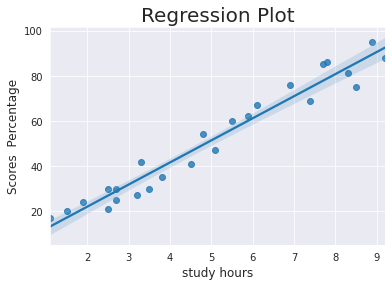

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [11]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Scores  Percentage', size=12)
plt.xlabel('study hours', size=12)
plt.show()
print(data.corr())

### Data Preprocessing

In [12]:
## Checking missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### There is no missing value in the Dataset 

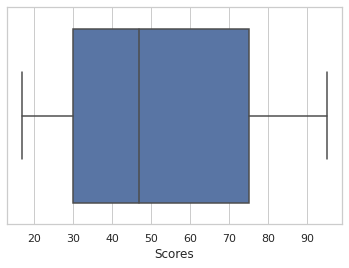

In [13]:
## Conforming no missing values by box plat 
sns.set_theme(style="whitegrid")
sns.boxplot(x=data["Scores"])

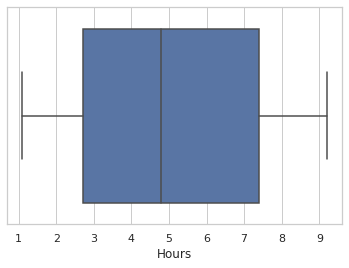

In [14]:
## Conforming no missing values by box plat 
sns.set_theme(style="whitegrid")
sns.boxplot(x=data["Hours"])

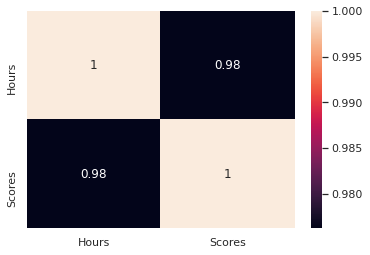

In [15]:
##Feature Selection
## Checking correlation
sns.heatmap(data.corr(),annot=True)

In [16]:
## Definig independent and dependent variables
X=data.iloc[:,0:-1].values
y=data.iloc[:, 1].values

In [22]:
## Definiging training and testing data
# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [20]:
LR = LinearRegression()
LR.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
## Model Evaluation
##prediciton on training data
y_train_predict=LR.predict(train_X)
from sklearn.metrics import r2_score
train_score=r2_score(train_y,y_train_predict)
train_score

0.9484509249326872

#### Predicting the Percentage of Marks

In [26]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


##### Comparing the Predicted Marks with the Actual Marks

In [27]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


####  Visually the Predicted Marks with the Actual Marks

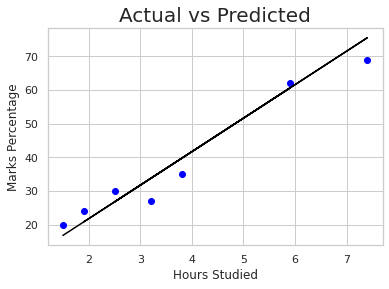

In [28]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [29]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


### **Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

#### What will be the predicted score of a student if he/she studies for 9.00 hrs/ day?

In [32]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


### **According to the model if a student studies for 9.25 hours a day he/she is likely to score 93.8 marks.**